# Link Prediction in the Dataset Of 2nd Approach

In this Jupyter Notebook as we continue our journey into link prediction, this time using the **2nd Approach**. In our earlier notebook, we crafted a dataset for link prediction using the 1st Approach, which involved connecting less popular nodes to neighbors of more popular nodes to create a well-balanced dataset.

In the 2nd Approach, we adopt a different perspective. This time, **`we keep the most popular node as the source and connect it to a less popular neighbor node`**. The goal of this strategy is to analyze how features like jaccard and adar impact the effectiveness of our link prediction model.

Just as before, our dataset consists of potential edges labeled as `1` (existing connections) and `0` (non-existing connections). By reversing the roles of the source and target nodes, we aim to train a classifier that distinguishes existing and non-existing edges based on features other than preferential attachment.

Now, we will using the Dataset to explore link prediction using two different methods: Artificial Neural Networks (ANN) and Linear Regression. Our goal remains the same - to predict connections within our network and evaluate the performance of these approaches in identifying potential edges.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
df_train = pd.read_csv('monthly3_train.csv')
df_test = pd.read_csv('monthly3_test.csv')

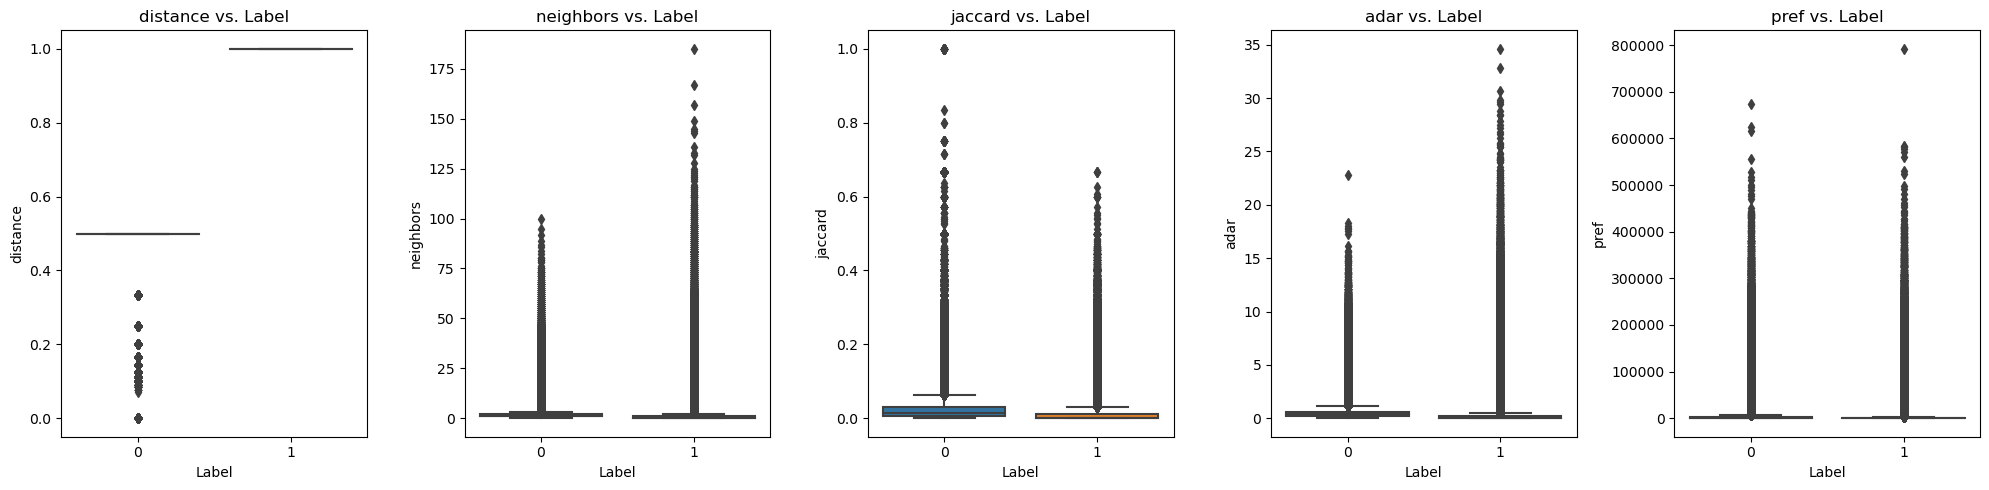

In [3]:
import seaborn as sns
feature_names = ['distance', 'neighbors', 'jaccard', 'adar', 'pref']
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, feature in enumerate(feature_names):
    sns.boxplot(x='label', y=feature, data=df_train, ax=axs[i])
    axs[i].set_title(f"{feature} vs. Label")
    axs[i].set_xlabel("Label")
    axs[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

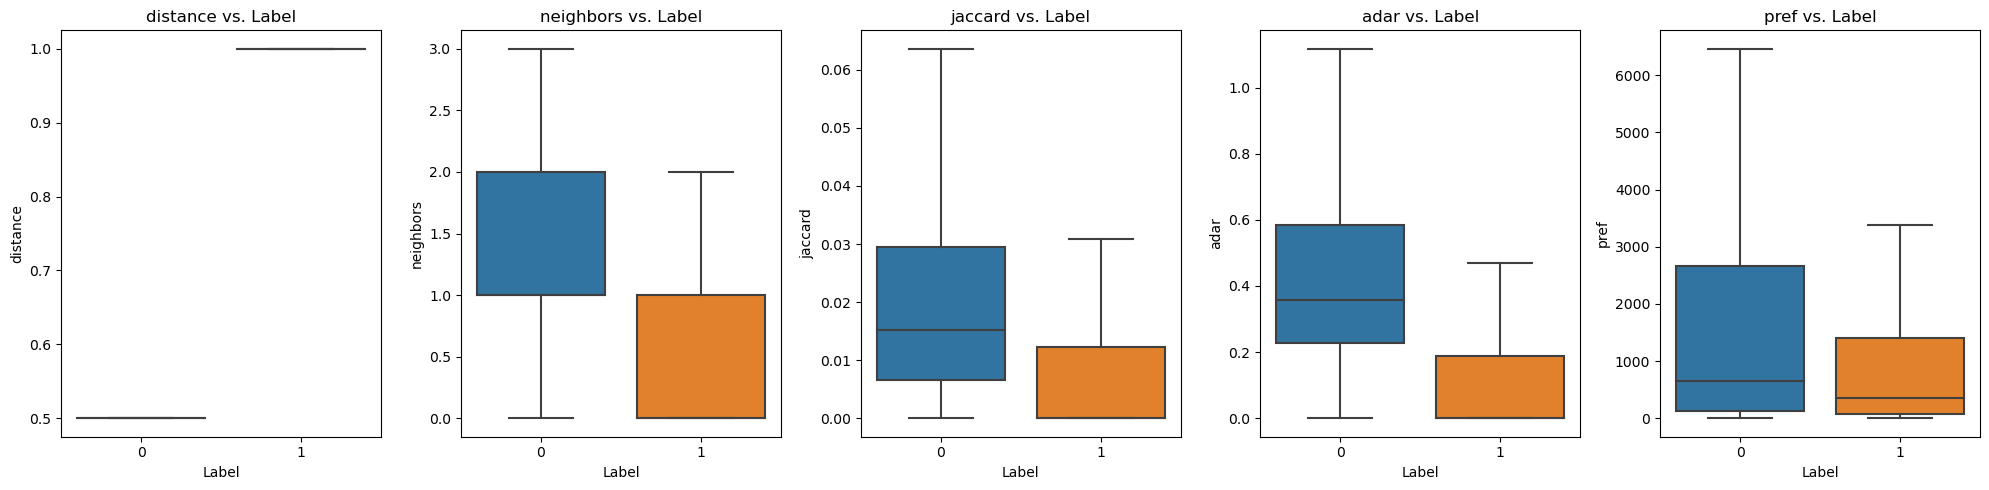

In [4]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, feature in enumerate(feature_names):
    sns.boxplot(x='label', y=feature, data=df_train, ax=axs[i], showfliers=False)
    axs[i].set_title(f"{feature} vs. Label")
    axs[i].set_xlabel("Label")
    axs[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

We've observed a noteworthy trend. Across various metrics used in link prediction, non-existing edges (label 0) consistently exhibit higher values. This intriguing pattern implies that non-existing edges, in this specific approach, possess features that result in elevated metric values.

    Distance Metric - A Special Case

However, there's a distinct case with the 'distance' metric. The 'distance' metric signifies the graph distance between nodes, and a distance of 1 directly indicates the presence of an existing edge (label 1). As a result, the 'distance' metric typically holds lower values for non-existing edges.

Due to this unique characteristic and the potential for the 'distance' metric to create trivial predictions (given that all existing edges have a distance of 1), we made the informed decision to exclude it from our prediction process.

This choice allows us to focus on the remaining informative features for more accurate link predictions, while recognizing the distinctive behavior of the 'distance' metric.

In [5]:
len(df_train)

31599674

In [6]:
len(df_test)

28042014

Let's show the Class Distribution of Labels in the Training Data

In [7]:
df_train['label'].value_counts()

1    15799837
0    15799837
Name: label, dtype: int64

### Data Preprocessing: Splitting the Dataset into Training and Testing Sets

In this step, we prepare the dataset by splitting it into training and testing sets. This data preprocessing is essential for building and evaluating our link prediction models.

In [13]:
X_train = df_train.drop(['possible_edges','distance', 'label'], axis=1)
y_train = df_train['label']
X_test = df_test.drop(['possible_edges','distance', 'label'], axis=1)
y_test = df_test['label']

### Data Scaling: Feature Scaling for Improved Model Performance

To enhance the performance of our link prediction models, we employ feature scaling. Feature scaling is a crucial data preprocessing step that ensures that all our feature variables are on the same scale. It helps the models converge faster and perform more effectively.

We are using **Min-Max scaling**.

In [16]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Building an Artificial Neural Network (ANN) for Link Prediction

In our quest for link prediction, we employ the power of Artificial Neural Networks (ANNs). They are highly effective for a wide range of tasks, including link prediction.

 The model architecture is as follows:

- Input Layer: The input layer with 64 units and a 'sigmoid' activation function, matching the number of features in our scaled dataset.
- Hidden Layer: A hidden layer with 32 units and a 'sigmoid' activation function.
- Output Layer: The output layer with a single unit and a 'sigmoid' activation function, suitable for binary classification.

We also set a learning rate of 0.001 to control the step size during training.

    We employ the same model to ensure a fair comparison.

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the learning rate
learning_rate = 0.001

# Create a Sequential model
model = tf.keras.Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)),
    # Dropout(0.5),  # Add dropout with a rate of 0.5
    Dense(32, activation='sigmoid'),
    # Dropout(0.5),  # Add dropout with a rate of 0.5
    Dense(1, activation='sigmoid')
])

2023-09-05 00:15:56.618930: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
# optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### Model Training: Training the ANN for Link Prediction

Now that our Artificial Neural Network (ANN) is configured and ready, it's time to train the model for link prediction. 

In this step, we use the following training settings:

- `X_train_scaled` and `y_train` are our training data, consisting of the scaled feature variables and corresponding binary labels.
- We set the number of training epochs to 3, indicating the number of complete passes through the training data.
- The batch size is set to 64, which determines the number of training examples processed in each iteration.
- We use a validation split of 20% to monitor the model's performance on a validation dataset during training.

    Once more, we employ the same fit parameters to ensure a fair comparison between our models.

In [19]:
model.fit(X_train_scaled, y_train, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
394996/394996 [==============================] - 315s 794us/step - loss: 0.4553 - accuracy: 0.8066 - val_loss: 0.4433 - val_accuracy: 0.8223
Epoch 2/3
394996/394996 [==============================] - 300s 760us/step - loss: 0.4372 - accuracy: 0.8151 - val_loss: 0.4337 - val_accuracy: 0.8219
Epoch 3/3
394996/394996 [==============================] - 303s 767us/step - loss: 0.4326 - accuracy: 0.8161 - val_loss: 0.4297 - val_accuracy: 0.8221


### Evaluate The Model

In [20]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {accuracy:.4f}")

876313/876313 [==============================] - 473s 539us/step - loss: 0.4374 - accuracy: 0.8128
Test accuracy: 0.8128


### Model Training and Evaluation: Logistic Regression

In addition to the Artificial Neural Network (ANN), we explore another approach for link prediction: Logistic Regression. Logistic Regression is a simple yet effective classification algorithm that's well-suited for binary classification tasks.

Here's what we do:

- We create a Logistic Regression model, `model1`, for link prediction.
- We train the model using the scaled training data, `X_train_scaled` and `y_train`.
- The model then makes predictions on the scaled testing data, `X_test_scaled`.
- We calculate the accuracy of the model's predictions and print the result.

This alternative approach, in addition to the ANN, allows us to compare the performance of different models for link prediction.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


model1 = LogisticRegression()

In [22]:
model1.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
y_pred = model1.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7630448725972393


### Comparative Model Evaluation

After thorough evaluation, we obtained the following results for our models:

- The test accuracy of the neural network stands at 81.28%.
- In comparison, the test accuracy of logistic regression is at 76.30%.

It's worth noting that these results represent a comparative analysis. We observe a slight decrease in performance when compared to the results from the **first approach**, suggesting that this approach may face some unique challenges in link prediction.
